## Machine Learning Plot

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
import warnings
from sklearn.exceptions import ConvergenceWarning
import sys, os
from pathlib import Path
from tqdm import tqdm
from scipy import stats
import multiprocessing as mp
import seaborn as sns
from matplotlib.patches import Patch
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('retina')

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, RationalQuadratic, ExpSineSquared

warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [2]:
sys.path.append(str(Path().resolve().parent.parent))
from path_manager import TEST_DATA_NB, PLOT_DIR, VEL_MODELS, MISC_DIR

In [3]:
plot1 = np.load(MISC_DIR /'plot1.npy')
plot2 = np.load(MISC_DIR/'plot2.npy')

In [4]:
def curve_plot(mape_t, label, color):
    # Calculate mean and standard error
    mean_mape = np.mean(mape_t, axis=0)
    # std_error = np.std(mape_t, axis=0) / np.sqrt(mape_t.shape[0])

    # # Calculate confidence interval
    # confidence = 0.95
    # n = mape_t.shape[0]
    # t = np.abs(stats.t.ppf((1 - confidence) / 2, n - 1))
    # margin_of_error = t * std_error
    # confidence_interval = margin_of_error

    plt.plot(np.arange(10), mean_mape[1::2] * 100, label = label, color = color)
    # plt.fill_between(np.arange(25/5, 501/5, 25/5), (mean_mape - confidence_interval) * 100, (mean_mape + confidence_interval) * 100, alpha = 0.2, color = tuple(np.array(color) / 2))

In [5]:
# Initialize lists
time_intervals = np.array(['300~\n350', '300~\n400', '300~\n450', '300~\n500', '300~\n550', '300~\n600', '300~\n650', '300~\n700', '300~\n750', '300~\n800'])
linear_mape1 = []
knn_mape1 = []
decision_tree_mape1 = []
random_forest_mape1 = []
gaussian_process_mape1 = []
extremely_randomized_trees_mape1 = []
neural_network_mape1 = []

# Read the file
with open(VEL_MODELS/ 'V_Model-1_Time-Resolved_mape_results_all_models.csv', 'r') as file:
    next(file)  # Skip header
    for line in file:
        data = line.split(',')
        linear_mape1.append(float(data[1]))
        knn_mape1.append(float(data[2]))
        decision_tree_mape1.append(float(data[3]))
        random_forest_mape1.append(float(data[4]))
        gaussian_process_mape1.append(float(data[5]))
        extremely_randomized_trees_mape1.append(float(data[6]))
        neural_network_mape1.append(float(data[7]))

In [6]:
# Initialize lists
linear_mape2 = []
knn_mape2 = []
decision_tree_mape2 = []
random_forest_mape2 = []
gaussian_process_mape2 = []
extremely_randomized_trees_mape2 = []
neural_network_mape2 = []

# Read the file
with open(VEL_MODELS/ 'V_Model-2_Time-Resolved_mape_results_all_models.csv', 'r') as file:
    next(file)  # Skip header
    for line in file:
        data = line.split(',')
        linear_mape2.append(float(data[1]))
        knn_mape2.append(float(data[2]))
        decision_tree_mape2.append(float(data[3]))
        random_forest_mape2.append(float(data[4]))
        gaussian_process_mape2.append(float(data[5]))
        extremely_randomized_trees_mape2.append(float(data[6]))
        neural_network_mape2.append(float(data[7]))

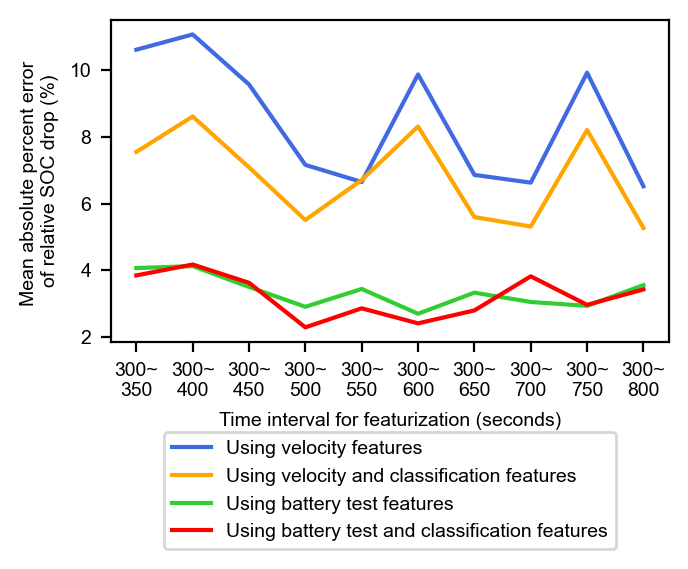

In [7]:
plt.figure(figsize = (9/2.54, 8/2.54))
plt.plot(np.arange(10), random_forest_mape1, label = 'Using velocity features', color = 'royalblue')
plt.plot(np.arange(10), random_forest_mape2, label = 'Using velocity and classification features', color = 'orange')
curve_plot(plot1[9], 'Using battery test features', 'limegreen')
curve_plot(plot2[9], 'Using battery test and classification features', 'red')
plt.xticks(np.arange(10), time_intervals, fontname='Arial', fontsize=7)
plt.tick_params(axis='x', labelfontfamily='Arial', labelsize=7)
plt.tick_params(axis='y', labelfontfamily='Arial', labelsize=7)
plt.xlabel("Time interval for featurization (seconds)", fontname='Arial', fontsize=7)
plt.ylabel("Mean absolute percent error \nof relative SOC drop (%)", fontname='Arial', fontsize=7)
# plt.title("Using random forest", fontname='Arial', fontsize=9)
# plt.xlim((0, 9))
plt.rc('legend', fontsize=7)
plt.legend(prop={'family': 'Arial'}, loc='upper center', bbox_to_anchor=(0.5, -0.25))
plt.tight_layout()
# plt.savefig('plot3.png', format='png', dpi=1000)
plt.show()

In [8]:
plot1[9]*100

array([[3.98615037, 4.06558102, 3.85668863, 4.12407592, 6.10994731,
        3.49942988, 3.2064107 , 2.90512414, 3.02497531, 3.44004982,
        4.1140602 , 2.69668879, 3.08861394, 3.32905545, 3.97778485,
        3.04970135, 3.88234925, 2.93363954, 3.72035091, 3.55507226]])

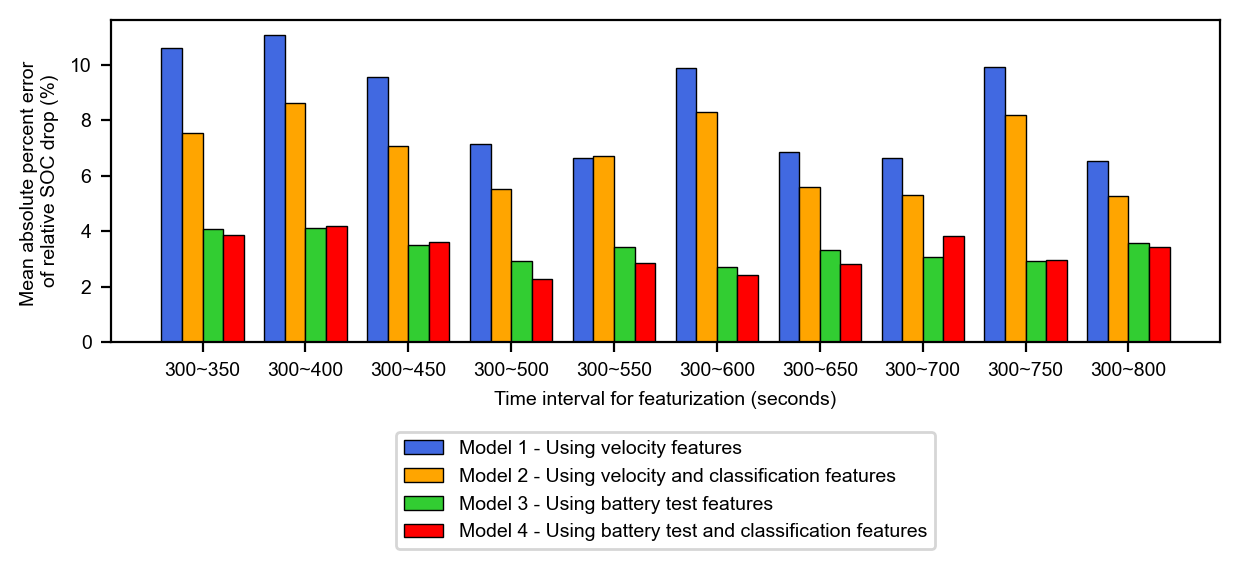

In [9]:
plt.figure(figsize=(16/2.54, 8/2.54))
time_intervals = np.array(['300~350', '300~400', '300~450', '300~500', '300~550', '300~600', '300~650', '300~700', '300~750', '300~800'])


# Create bar plots with edges
bar_width = 0.2  # Width of the bars
index = np.arange(10)

plt.bar(index - 1/2 * bar_width, random_forest_mape1, width=bar_width, label='Model 1 - Using velocity features', color='royalblue', edgecolor='black', linewidth=0.5)
plt.bar(index + 1/2 * bar_width, random_forest_mape2, width=bar_width, label='Model 2 - Using velocity and classification features', color='orange', edgecolor='black', linewidth=0.5)
plt.bar(index + 3/2 * bar_width, np.mean(plot1[9], axis=0)[1::2] * 100, width=bar_width, label='Model 3 - Using battery test features', color='limegreen', edgecolor='black', linewidth=0.5)
plt.bar(index + 5/2 * bar_width, np.mean(plot2[9], axis=0)[1::2] * 100, width=bar_width, label='Model 4 - Using battery test and classification features', color='red', edgecolor='black', linewidth=0.5)

plt.xticks(index + bar_width, time_intervals, fontname='Arial', fontsize=7)
plt.tick_params(axis='x', labelfontfamily='Arial', labelsize=7)
plt.tick_params(axis='y', labelfontfamily='Arial', labelsize=7)
plt.xlabel("Time interval for featurization (seconds)", fontname='Arial', fontsize=7)
plt.ylabel("Mean absolute percent error \nof relative SOC drop (%)", fontname='Arial', fontsize=7)

# Adjust the legend and layout
plt.rc('legend', fontsize=7)
plt.legend(prop={'family': 'Arial'}, loc='upper center', bbox_to_anchor=(0.5, -0.25))
plt.tight_layout()

# Save the plot
# plt.savefig('plot5.png', format='png', dpi=1000)
plt.show()

In [11]:
plot1[9]

array([[0.0398615 , 0.04065581, 0.03856689, 0.04124076, 0.06109947,
        0.0349943 , 0.03206411, 0.02905124, 0.03024975, 0.0344005 ,
        0.0411406 , 0.02696689, 0.03088614, 0.03329055, 0.03977785,
        0.03049701, 0.03882349, 0.0293364 , 0.03720351, 0.03555072]])

## Final plot

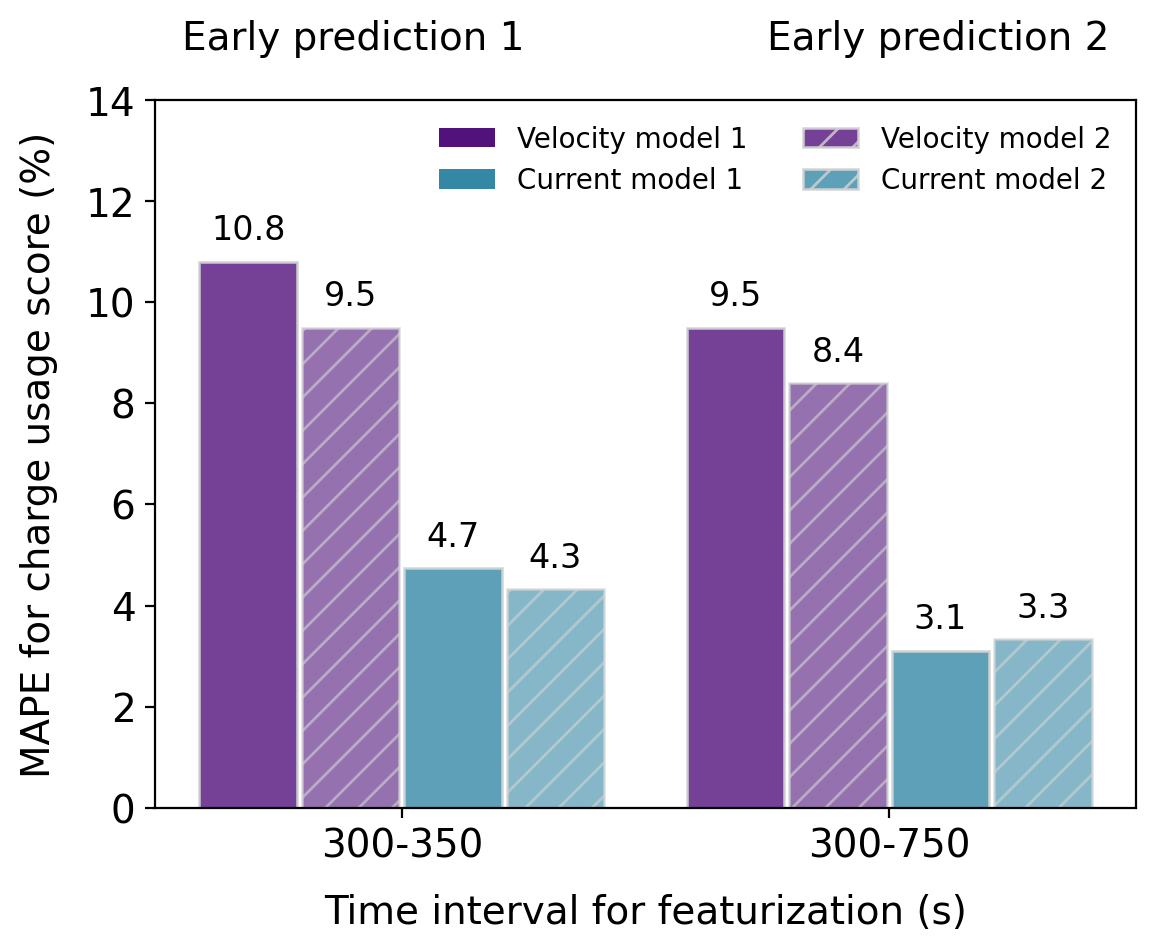

In [10]:
sns.reset_orig()
plt.rcdefaults()
plt.rcParams['font.size'] = 14
fig, ax1 = plt.subplots(figsize=(6, 5))

first_index_values = [10.8, 9.5, 4.74, 4.32]
eighth_index_values = [9.5, 8.4, 3.1, 3.33]

bar_labels = ['Velocity model 1', 'Velocity model 2',
              'Current model 1', 'Current model 2']
x_labels = ['300-350', '300-750']

velocity_color = sns.color_palette("magma", as_cmap=True)(0.25)
current_color = sns.color_palette("mako", as_cmap=True)(0.55)

bar_width = 0.20
gap = 0.01

positions1 = [0 - 1.5 * (bar_width + gap), 0 - 0.5 * (bar_width + gap),
              0 + 0.5 * (bar_width + gap), 0 + 1.5 * (bar_width + gap)]
positions2 = [1 - 1.5 * (bar_width + gap), 1 - 0.5 * (bar_width + gap),
              1 + 0.5 * (bar_width + gap), 1 + 1.5 * (bar_width + gap)]

legend_elements = [
    plt.Rectangle((0,0), 1, 1, facecolor=velocity_color, alpha=1, label='Velocity model 1'),
    plt.Rectangle((0,0), 1, 1, facecolor=current_color, alpha=1, label='Current model 1'),
    plt.Rectangle((0,0), 1, 1, facecolor=velocity_color, hatch='//', alpha=0.8, label='Velocity model 2', ec='lightgrey', fill=True),
    plt.Rectangle((0,0), 1, 1, facecolor=current_color, hatch='//', alpha=0.8, label='Current model 2', ec='lightgrey', fill=True)]

for i in range(len(first_index_values)):
    if i == 0:
        color, hatch, alpha = velocity_color, None, 0.8
    elif i == 1:
        color, hatch, alpha = velocity_color, '//', 0.6
    elif i == 2:
        color, hatch, alpha = current_color, None, 0.8
    elif i == 3: 
        color, hatch, alpha = current_color, '//', 0.6 

    plt.bar(positions1[i], first_index_values[i], width=bar_width, color=color, hatch=hatch, ec="lightgrey", alpha=alpha)
    plt.bar(positions2[i], eighth_index_values[i], width=bar_width, color=color, hatch=hatch, ec="lightgrey", alpha=alpha)

    plt.text(positions1[i], first_index_values[i] + 0.3, f'{first_index_values[i]:.1f}', 
             ha='center', va='bottom', color='black', fontsize=12)
    plt.text(positions2[i], eighth_index_values[i] + 0.3, f'{eighth_index_values[i]:.1f}', 
             ha='center', va='bottom', color='black', fontsize=12)

legend = ax1.legend(handles=legend_elements, 
                   loc='upper right',
                   fontsize=10,
                   ncol=2,
                   bbox_to_anchor=(1, 1),
                   frameon=False) 


group1_center = sum(positions1[:2]) / 2 + 0.21  
group2_center = sum(positions2[:2]) / 2 + 0.21  

ax1.text(group1_center-0.1, 15, 'Early prediction 1', ha='center')
ax1.text(group2_center+0.1, 15, 'Early prediction 2', ha='center')

ax1.set_xticks([group1_center, group2_center])
ax1.set_xticklabels(x_labels)

plt.xlabel('Time interval for featurization (s)', labelpad=10)
plt.ylabel('MAPE for charge usage score (%)', labelpad=10)
plt.ylim(0, 14)
plt.tight_layout()
# fig.savefig(PLOT_DIR / 'early_prediction_comp.svg', format='svg', dpi=2000, bbox_inches='tight')
plt.show()